In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [2]:
df=pd.read_csv("Healthcare Associated Infections_Hospital.csv",encoding='latin1')

In [3]:
df.head()

Provider ID                     Hospital Name                 Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
1        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
2        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
3        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   
4        10001  SOUTHEAST ALABAMA MEDICAL CENTER  1108 ROSS CLARK CIRCLE   

     City State  ZIP Code County Name  Phone Number  \
0  DOTHAN    AL     36301     HOUSTON    3347938701   
1  DOTHAN    AL     36301     HOUSTON    3347938701   
2  DOTHAN    AL     36301     HOUSTON    3347938701   
3  DOTHAN    AL     36301     HOUSTON    3347938701   
4  DOTHAN    AL     36301     HOUSTON    3347938701   

                     Measure Name       Measure ID Compared to National  \
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER                  NaN   
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER                  NaN   
2   CLABSI: Number of Device Days  HAI_1_DOPC_DAYS                  NaN   
3         CLABSI: Predicted Cases  HAI_1_ELIGCASES                  NaN   
4          CLABSI: Observed Cases  HAI_1_NUMERATOR                  NaN   

   Score Footnote Measure Start Date Measure End Date  
0   1.03      NaN           1/1/2015       12/31/2015  
1  2.765      NaN           1/1/2015       12/31/2015  
2   7117      NaN           1/1/2015       12/31/2015  
3  9.198      NaN           1/1/2015       12/31/2015  
4     16      NaN           1/1/2015       12/31/2015

In [4]:
df.shape

(231264, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
Provider ID             231264 non-null int64
Hospital Name           231264 non-null object
Address                 231264 non-null object
City                    231264 non-null object
State                   231264 non-null object
ZIP Code                231264 non-null int64
County Name             230544 non-null object
Phone Number            231264 non-null int64
Measure Name            231264 non-null object
Measure ID              231264 non-null object
Compared to National    38544 non-null object
Score                   231264 non-null object
Footnote                103373 non-null object
Measure Start Date      231264 non-null object
Measure End Date        231264 non-null object
dtypes: int64(3), object(12)
memory usage: 26.5+ MB


In [6]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID              0.00
Hospital Name            0.00
Address                  0.00
City                     0.00
State                    0.00
ZIP Code                 0.00
County Name              0.31
Phone Number             0.00
Measure Name             0.00
Measure ID               0.00
Compared to National    83.33
Score                    0.00
Footnote                55.30
Measure Start Date       0.00
Measure End Date         0.00
dtype: float64

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [7]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(231264, 13)

In [8]:
df=df.dropna(axis=0, how='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230544 entries, 0 to 231263
Data columns (total 13 columns):
Provider ID           230544 non-null int64
Hospital Name         230544 non-null object
Address               230544 non-null object
City                  230544 non-null object
State                 230544 non-null object
ZIP Code              230544 non-null int64
County Name           230544 non-null object
Phone Number          230544 non-null int64
Measure Name          230544 non-null object
Measure ID            230544 non-null object
Score                 230544 non-null object
Measure Start Date    230544 non-null object
Measure End Date      230544 non-null object
dtypes: int64(3), object(10)
memory usage: 24.6+ MB


In [10]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230544 entries, 0 to 231263
Data columns (total 13 columns):
Provider ID           230544 non-null int64
Hospital Name         230544 non-null object
Address               230544 non-null object
City                  230544 non-null object
State                 230544 non-null object
ZIP Code              230544 non-null int64
County Name           230544 non-null object
Phone Number          230544 non-null int64
Measure Name          230544 non-null object
Measure ID            230544 non-null object
Score                 230544 non-null object
Measure Start Date    230544 non-null object
Measure End Date      230544 non-null object
dtypes: int64(3), object(10)
memory usage: 24.6+ MB


### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [11]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230544 entries, 0 to 231263
Data columns (total 9 columns):
Provider ID           230544 non-null int64
Hospital Name         230544 non-null object
ZIP Code              230544 non-null int64
County Name           230544 non-null object
Measure Name          230544 non-null object
Measure ID            230544 non-null object
Score                 230544 non-null object
Measure Start Date    230544 non-null object
Measure End Date      230544 non-null object
dtypes: int64(2), object(7)
memory usage: 17.6+ MB


### Converting some categorical variables to numeric

In [13]:
df = df.replace(['Not Available','Not Applicable'],0)

In [15]:
df["Score"] = df["Score"].apply(pd.to_numeric,errors='coerce')


In [16]:
df=df.fillna(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230544 entries, 0 to 231263
Data columns (total 9 columns):
Provider ID           230544 non-null int64
Hospital Name         230544 non-null object
ZIP Code              230544 non-null int64
County Name           230544 non-null object
Measure Name          230544 non-null object
Measure ID            230544 non-null object
Score                 230544 non-null float64
Measure Start Date    230544 non-null object
Measure End Date      230544 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 17.6+ MB


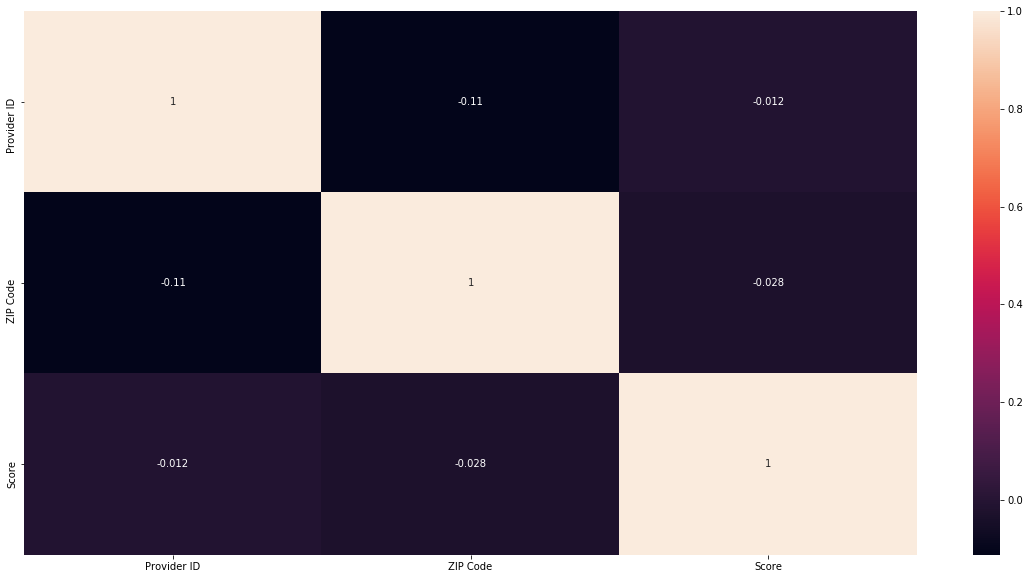

In [18]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [19]:
df.to_csv('Healthcare Associated Infections.csv')

In [20]:
HAsocInf = df[:]
HAsocInf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230544 entries, 0 to 231263
Data columns (total 9 columns):
Provider ID           230544 non-null int64
Hospital Name         230544 non-null object
ZIP Code              230544 non-null int64
County Name           230544 non-null object
Measure Name          230544 non-null object
Measure ID            230544 non-null object
Score                 230544 non-null float64
Measure Start Date    230544 non-null object
Measure End Date      230544 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 17.6+ MB
